In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
# Load the dataset
ORD = pd.read_excel("../input/online-retail-ii-dataset/online_retail_II.xlsx")

In [3]:
# Display first 5 rows/transactions
ORD.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
# Summary stats
ORD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
Invoice        525461 non-null object
StockCode      525461 non-null object
Description    522533 non-null object
Quantity       525461 non-null int64
InvoiceDate    525461 non-null datetime64[ns]
Price          525461 non-null float64
Customer ID    417534 non-null float64
Country        525461 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
# checking for duplicate transactions
ORD.duplicated().sum()

6865

In [6]:
print("Number of transactions before duplicates removal : %d " % ORD.shape[0])
# Dropping the duplicated transactions
ORD = ORD.drop(index=ORD[ORD.duplicated()].index)
print("Number of transactions after duplicates removal  : %d " % ORD.shape[0])

Number of transactions before duplicates removal : 525461 
Number of transactions after duplicates removal  : 518596 


In [7]:
# Checking for cancelled transactions
ORD[ORD['Invoice'].astype(str).str[0] == 'C'].tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom
525282,C538164,35004B,SET OF 3 BLACK FLYING DUCKS,-1,2010-12-09 17:32:00,1.95,14031.0,United Kingdom


In [8]:
print("Number of transactions before dropping the cancelled transactions : %d " % ORD.shape[0])
# Dropping the cancelled transactions
ORD = ORD.drop(index=ORD[ORD['Invoice'].astype(str).str[0] == 'C'].index)
print("Number of transactions after dropping the cancelled transactions  : %d " % ORD.shape[0])

Number of transactions before dropping the cancelled transactions : 518596 
Number of transactions after dropping the cancelled transactions  : 508414 


In [9]:
# Checking for missing values
ORD.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107467
Country             0
dtype: int64

In [10]:
# Remove transactions with missing product description
ORD = ORD.drop(index=ORD[ORD['Description'].isnull()].index)
# still any missing product descriptions ?
ORD.isnull().sum()

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    104539
Country             0
dtype: int64

In [11]:
# Dropping transactions with negative quantity 
ORD = ORD.drop(index = ORD[ORD['Quantity'] <= 0].index)

In [12]:
# Summary stats for feature 'Country'
ORD['Country'].describe()

count             505192
unique                40
top       United Kingdom
freq              467054
Name: Country, dtype: object

In [13]:
# transactions count by country
ORD['Country'].value_counts()

United Kingdom          467054
EIRE                      9451
Germany                   7652
France                    5514
Netherlands               2729
Spain                     1228
Switzerland               1170
Portugal                  1058
Belgium                   1037
Sweden                     886
Channel Islands            821
Italy                      708
Australia                  630
Cyprus                     533
Austria                    524
Greece                     512
Denmark                    418
United Arab Emirates       399
Norway                     365
Finland                    347
Unspecified                306
USA                        230
Poland                     182
Malta                      170
Japan                      164
Lithuania                  154
Singapore                  117
RSA                        110
Bahrain                    106
Canada                      77
Thailand                    76
Israel                      74
Hong Kon

# We will analyse transactions from 'Germany' 

In [14]:
country = 'Germany'
ord_country = ORD[ORD['Country'] == country]

In [15]:
print("Number of unique invoices : %d " % len(ord_country['Invoice'].value_counts()))
print("Number of unique products : %d " % len(ord_country['Description'].value_counts()))

Number of unique invoices : 347 
Number of unique products : 1612 


In [16]:
# Product sold quantity per invoice
freq = ord_country.groupby(['Invoice', 'Description'])['Quantity'].sum()

In [17]:
prod_freq = freq.unstack().fillna(0).reset_index().set_index('Invoice')
prod_freq.head()

Description,3 STRIPEY MICE FELTCRAFT,CHERRY BLOSSOM DECORATIVE FLASK,FLAMINGO LIGHTS,RED/WHITE DOT MINI CASES,SET 2 TEA TOWELS I LOVE LONDON,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 MINI TOADSTOOL PEGS,...,"WRAP,SUKI AND FRIENDS",YELLOW BROWN BEAR FELT PURSE KIT,YELLOW KNITTED KIDS RUCKSACK,YELLOW PURPLE DAISY FELT PURSE KIT,YELLOW SHARK HELICOPTER,YULETIDE IMAGES GIFT WRAP SET,ZINC FOLKART SLEIGH BELLS,ZINC METAL HEART DECORATION,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
Invoice,,,,,,,,,,,,,,,,,,,,,
489526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,24.0
490395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
490563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
490564,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
490682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Set value to 1 for postivie quantity. Anything else set to 0
product_set = prod_freq.applymap(lambda x : 1 if x > 0 else 0 )
product_set.head()

Description,3 STRIPEY MICE FELTCRAFT,CHERRY BLOSSOM DECORATIVE FLASK,FLAMINGO LIGHTS,RED/WHITE DOT MINI CASES,SET 2 TEA TOWELS I LOVE LONDON,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 MINI TOADSTOOL PEGS,...,"WRAP,SUKI AND FRIENDS",YELLOW BROWN BEAR FELT PURSE KIT,YELLOW KNITTED KIDS RUCKSACK,YELLOW PURPLE DAISY FELT PURSE KIT,YELLOW SHARK HELICOPTER,YULETIDE IMAGES GIFT WRAP SET,ZINC FOLKART SLEIGH BELLS,ZINC METAL HEART DECORATION,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
Invoice,,,,,,,,,,,,,,,,,,,,,
489526,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
490395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
490563,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
490564,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
490682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


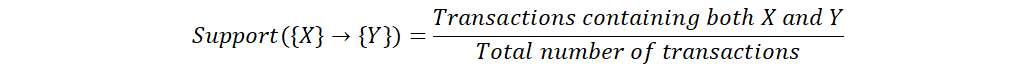

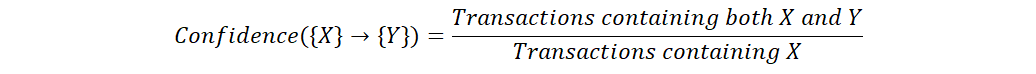

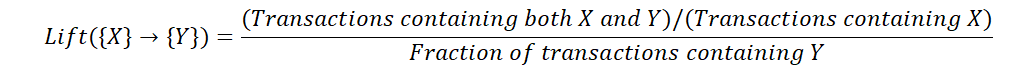

# Frequent Productsets via Apriori Algorithm

In [19]:
# return the products and productsets with at least 10% support
frequent_products = apriori(product_set, min_support=0.1, use_colnames=True)
frequent_products['length'] = frequent_products['itemsets'].apply(lambda x : len(x))
# productset of length 2 
frequent_products[frequent_products.length > 1]

,support,itemsets,length
12,0.103746,"(PLASTERS IN TIN CIRCUS PARADE , POSTAGE)",2
13,0.109510,"(PLASTERS IN TIN WOODLAND ANIMALS, POSTAGE)",2
14,0.103746,"(RED SPOTTY CUP, POSTAGE)",2
15,0.155620,"(RED TOADSTOOL LED NIGHT LIGHT, POSTAGE)",2
16,0.175793,"(POSTAGE, ROUND SNACK BOXES SET OF 4 FRUITS )",2
17,0.262248,"(ROUND SNACK BOXES SET OF4 WOODLAND , POSTAGE)",2
18,0.193084,"(WOODLAND CHARLOTTE BAG, POSTAGE)",2
19,0.123919,"(POSTAGE, WOODLAND DESIGN COTTON TOTE BAG)",2
20,0.103746,"(POSTAGE, WOODLAND PARTY BAG + STICKER SET)",2
21,0.146974,"(ROUND SNACK BOXES SET OF4 WOODLAND , ROUND SN...",2


# Association Rules generation from Frequent Productsets


In [20]:
# Identiy frequent productsets with the level of confidence above the 70 percent threshold
rules = association_rules(frequent_products, metric="confidence", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PLASTERS IN TIN CIRCUS PARADE ),(POSTAGE),0.121037,0.780980,0.103746,0.857143,1.097522,0.009219,1.533141
1,(PLASTERS IN TIN WOODLAND ANIMALS),(POSTAGE),0.129683,0.780980,0.109510,0.844444,1.081263,0.008230,1.407987
2,(RED SPOTTY CUP),(POSTAGE),0.129683,0.780980,0.103746,0.800000,1.024354,0.002467,1.095101
3,(RED TOADSTOOL LED NIGHT LIGHT),(POSTAGE),0.178674,0.780980,0.155620,0.870968,1.115224,0.016079,1.697406
4,(ROUND SNACK BOXES SET OF 4 FRUITS ),(POSTAGE),0.187320,0.780980,0.175793,0.938462,1.201646,0.029499,3.559078
5,(ROUND SNACK BOXES SET OF4 WOODLAND ),(POSTAGE),0.285303,0.780980,0.262248,0.919192,1.176973,0.039432,2.710375
6,(WOODLAND CHARLOTTE BAG),(POSTAGE),0.216138,0.780980,0.193084,0.893333,1.143862,0.024284,2.053314
7,(WOODLAND DESIGN COTTON TOTE BAG),(POSTAGE),0.144092,0.780980,0.123919,0.860000,1.101181,0.011386,1.564430
8,(WOODLAND PARTY BAG + STICKER SET),(POSTAGE),0.118156,0.780980,0.103746,0.878049,1.124291,0.011469,1.795965
9,(ROUND SNACK BOXES SET OF 4 FRUITS ),(ROUND SNACK BOXES SET OF4 WOODLAND ),0.187320,0.285303,0.146974,0.784615,2.750117,0.093531,3.318238


In [21]:
# Identify productsets with lift socre of >= 2
rules[rules['lift'] >= 2]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,(ROUND SNACK BOXES SET OF 4 FRUITS ),(ROUND SNACK BOXES SET OF4 WOODLAND ),0.187320,0.285303,0.146974,0.784615,2.750117,0.093531,3.318238
10,"(POSTAGE, ROUND SNACK BOXES SET OF 4 FRUITS )",(ROUND SNACK BOXES SET OF4 WOODLAND ),0.175793,0.285303,0.135447,0.770492,2.700613,0.085293,3.114039
12,(ROUND SNACK BOXES SET OF 4 FRUITS ),"(ROUND SNACK BOXES SET OF4 WOODLAND , POSTAGE)",0.187320,0.262248,0.135447,0.723077,2.757227,0.086322,2.664105
